In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 

In [2]:
df = pd.read_csv('Maternal Health Risk Data Set.csv')
df.head()


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
df.shape

(1014, 7)

In [4]:
dfn=pd.read_csv('Maternal Health Risk Data Set.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [6]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [7]:
for col in df.columns:
    num_unique_value =df[col].nunique()
    print(f'number of unique values in {col} : {num_unique_value}')

number of unique values in Age : 50
number of unique values in SystolicBP : 19
number of unique values in DiastolicBP : 16
number of unique values in BS : 29
number of unique values in BodyTemp : 8
number of unique values in HeartRate : 16
number of unique values in RiskLevel : 3


In [8]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

# removal of duplicate row

In [9]:
duplicates = df[df.duplicated()]
print("Duplicated Rows")
print(duplicates)


Duplicated Rows
      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
67     19         120           80   7.0      98.0         70   mid risk
72     19         120           80   7.0      98.0         70   mid risk
97     19         120           80   7.0      98.0         70   mid risk
106    50         140           90  15.0      98.0         90  high risk
107    25         140          100   6.8      98.0         80  high risk
...   ...         ...          ...   ...       ...        ...        ...
1009   22         120           60  15.0      98.0         80  high risk
1010   55         120           90  18.0      98.0         60  high risk
1011   35          85           60  19.0      98.0         86  high risk
1012   43         120           90  18.0      98.0         70  high risk
1013   32         120           65   6.0     101.0         76   mid risk

[562 rows x 7 columns]


In [10]:
df_cleaned = df.drop_duplicates()
df_cleaned

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
673,12,100,50,6.4,98.0,70,mid risk
674,15,100,60,6.0,98.0,80,low risk
703,15,100,49,7.6,98.0,77,low risk
704,12,100,50,6.0,98.0,70,mid risk


# outliers

C:\Users\girah\AppData\Local\Temp\ipykernel_8048\1861956126.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop('RiskLevel',axis=1,inplace=True)


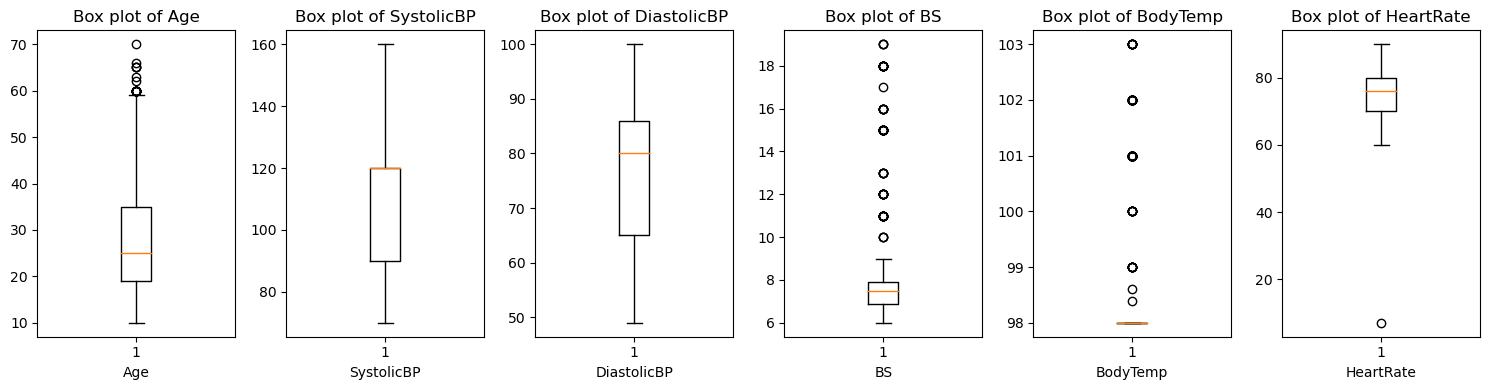

In [11]:
plt.figure(figsize=(15, 4))  
df_cleaned.drop('RiskLevel',axis=1,inplace=True)
for i, column in enumerate(df_cleaned.columns):
    
    plt.subplot(1, len(df_cleaned.columns), i+1)
    plt.boxplot(df_cleaned[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  
plt.show()
    

In [12]:
q1 =df_cleaned.quantile(0.25)
q3 =df_cleaned.quantile(0.75)
IQR = q3-q1
outliers = ((df_cleaned < (q1 -1.5*IQR))| (df_cleaned > (q3 +1.5 *IQR))).any(axis=1)
outliers

0       True
1       True
2       True
3      False
4      False
       ...  
673    False
674    False
703    False
704    False
705    False
Length: 452, dtype: bool

# univariate analysis

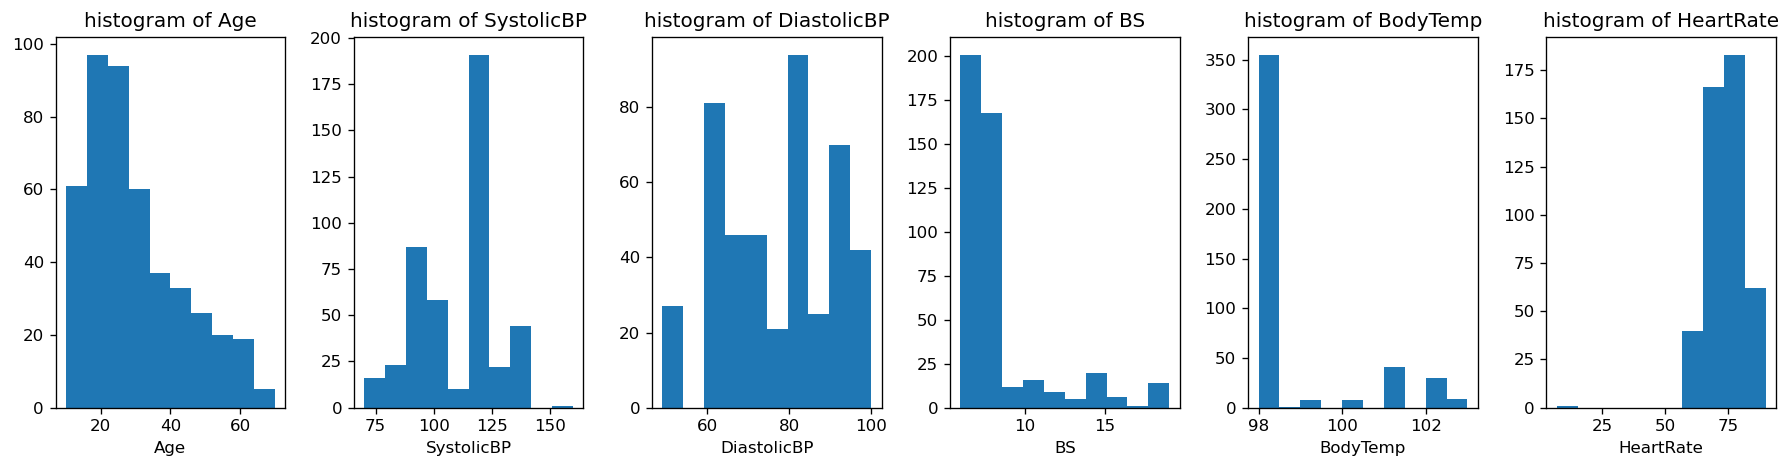

In [13]:
plt.figure(figsize=(15,4),dpi=120)
for i,column in enumerate(df_cleaned.columns):
    plt.subplot(1,len(df_cleaned.columns),i+1)
    plt.hist(df_cleaned[column])
    plt.title(f'histogram of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

In [14]:
xfont = {'family': 'serif',
    'color': 'k',
    'weight': 'bold',
    'size': 12,
    }

yfont = {'family': 'serif',
    'color': 'k',
    'weight': 'bold',
    'size': 12,
    }
title_font = {'family': 'serif',
    'color': 'k',
    'weight': 'bold',
    'size': 14,
    'style':'normal'
    }
legend_prop = {
    'weight':'semibold',
    'size':12,
    'style':'italic'
    }
highlight = {
    'family': 'serif',
    'color': 'darkviolet',
    'weight': 'bold',
    'size': 12,
    }

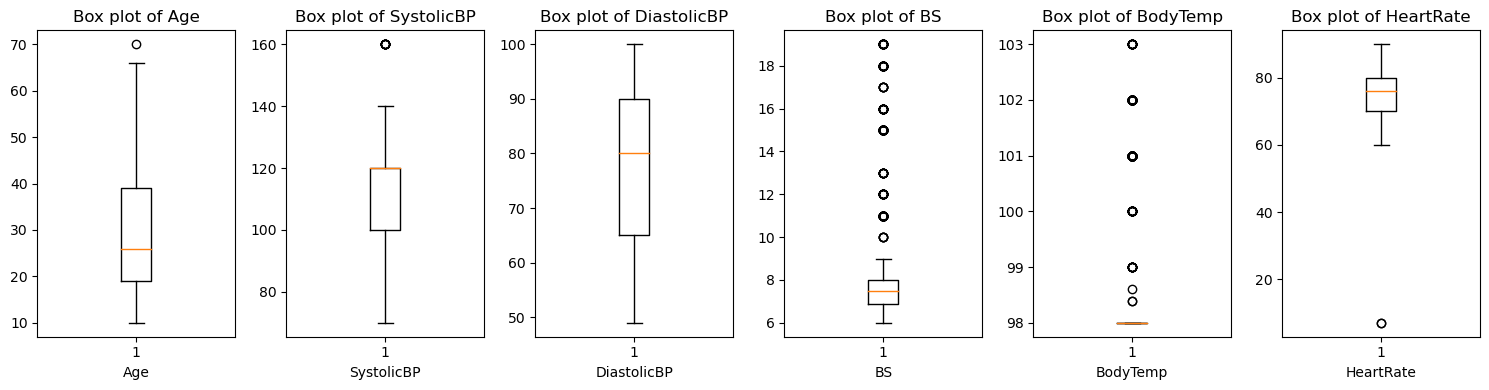

In [15]:
df.drop('RiskLevel',axis=1,inplace=True)
plt.figure(figsize=(15, 4))  

for i, column in enumerate(df.columns):
    
    plt.subplot(1, len(df.columns), i+1)
    plt.boxplot(df[column])
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)

plt.tight_layout()  
plt.show()


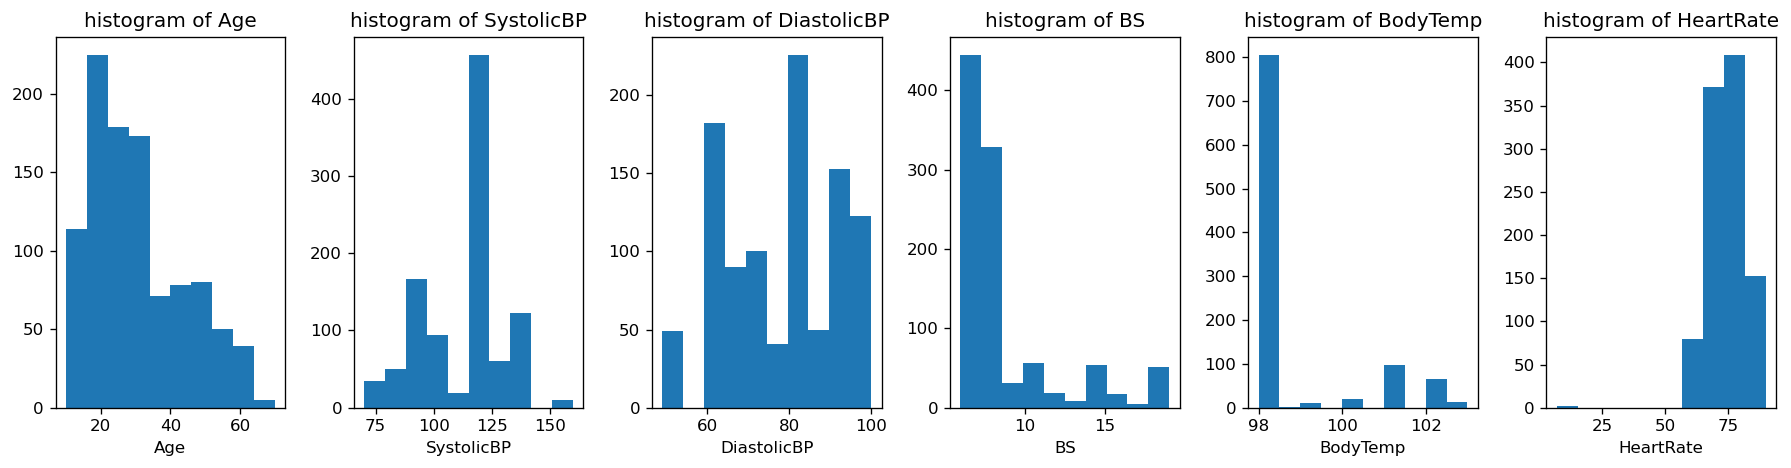

In [16]:
plt.figure(figsize=(15,4),dpi=120)
for i,column in enumerate(df.columns):
    plt.subplot(1,len(df.columns),i+1)
    plt.hist(df[column])
    plt.title(f'histogram of {column}')
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

In [17]:
new=df.sort_values(by=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'],inplace=False)
print(new.head())

     Age  SystolicBP  DiastolicBP   BS  BodyTemp  HeartRate
19    10          70           50  6.9      98.0         70
250   10          85           65  6.9      98.0         70
670   10         100           50  6.0      99.0         70
849   10         100           50  6.0      99.0         70
552   12          90           60  7.5     102.0         60


In [18]:
dfn = pd.read_csv('Maternal Health Risk Data Set.csv')
label_encoder = LabelEncoder()
dfn['RiskLevel'] = label_encoder.fit_transform(dfn['RiskLevel'])
dfn.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


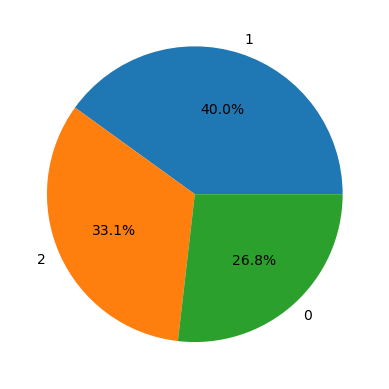

In [19]:
plt.figure()
plt.subplot()
risk_count = dfn['RiskLevel'].value_counts()
plt.pie(risk_count,labels=risk_count.index,autopct='%1.1f%%')
plt.show()

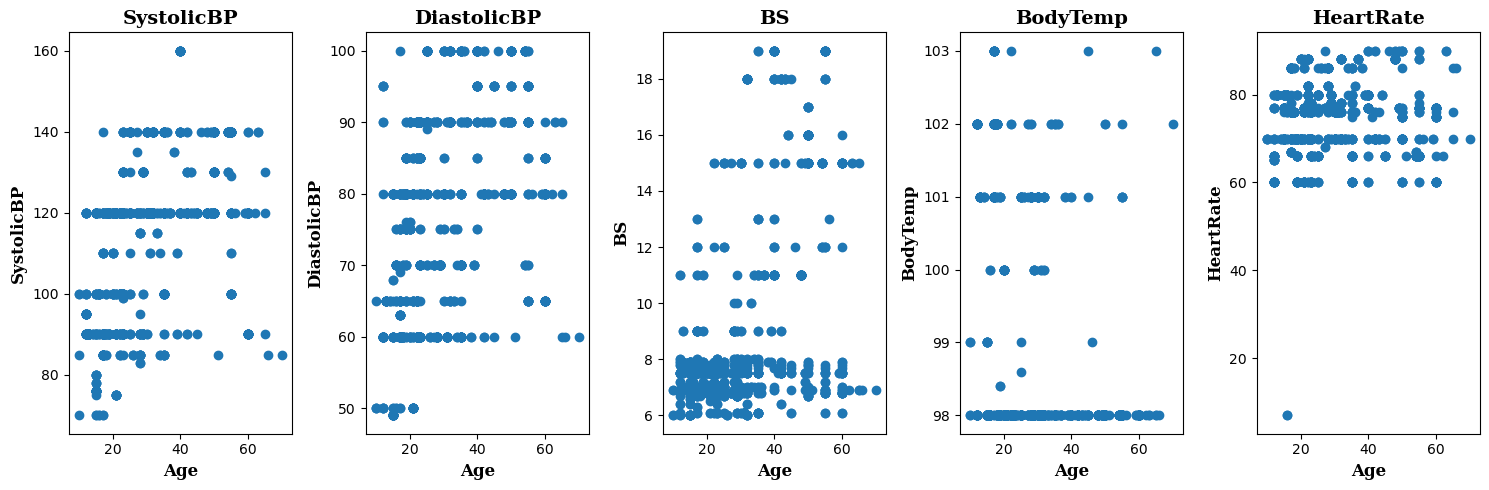

In [20]:
fig, axes = plt.subplots(1, len(df.columns)-1, figsize=(15, 5))

for i, column in enumerate(df.columns):
    if column != 'Age':
        ax = axes[i-1] if len(df.columns) > 2 else axes
        ax.scatter(df['Age'], df[column])
        ax.set_xlabel('Age', fontdict=xfont)
        ax.set_ylabel(column, fontdict=yfont)
        ax.set_title(column, fontdict=title_font)

plt.tight_layout()
plt.show()


In [21]:
data_info = pd.DataFrame(dfn.dtypes,columns=['dtype'])
data_info['unique'] =dfn.nunique().values
data_info['null']=dfn.isnull().sum().values


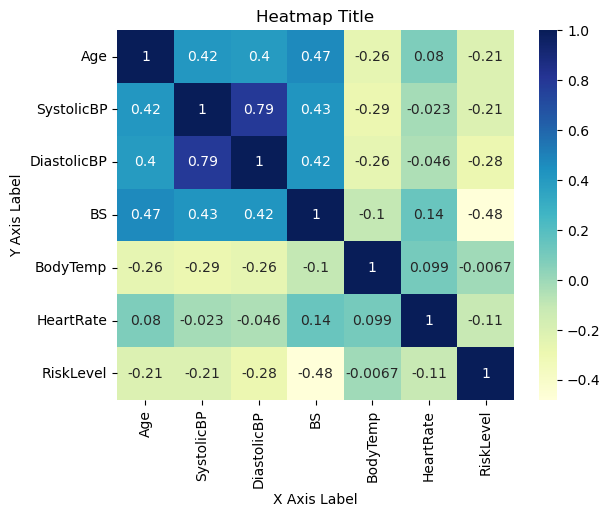

In [22]:
corr = dfn.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Heatmap Title')
plt.show()

In [23]:
dfn['DiastolicBP'].value_counts().reset_index(name='count')
dfn.groupby('RiskLevel')['SystolicBP'].count()

RiskLevel
0    272
1    406
2    336
Name: SystolicBP, dtype: int64

In [24]:
age_risk_pie = pd.DataFrame({
    "RiskLevel":["high risk","low risk","mid risk"],
    "Age":["272","406","336"]
})
age_risk_pie

,RiskLevel,Age
0,high risk,272
1,low risk,406
2,mid risk,336


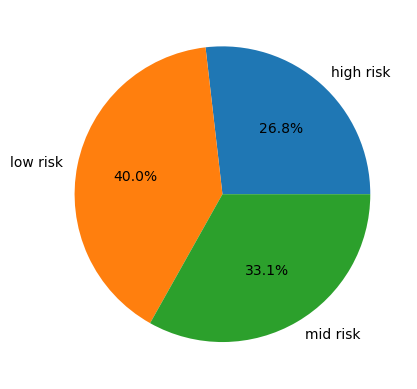

In [25]:
plt.figure()
plt.subplot()
plt.pie(age_risk_pie['Age'],labels=age_risk_pie['RiskLevel'],autopct='%1.1f%%')
plt.show()

In [26]:
one_hot_encoding = pd.get_dummies(dfn['RiskLevel'])
new_title=one_hot_encoding.rename(columns={0: "high risk", 1: "low risk", 2: "mid risk"})
age_df = dfn['Age']
age_risk = pd.concat([new_title, age_df],axis=1)
final= new_title[['high risk', 'low risk', 'mid risk']].replace({True: 1, False: 0})
age_risk = pd.concat([final,age_df],axis=1)
age_risk

,high risk,low risk,mid risk,Age
0,1,0,0,25
1,1,0,0,35
2,1,0,0,29
3,1,0,0,30
4,0,1,0,35
...,...,...,...,...
1009,1,0,0,22
1010,1,0,0,55
1011,1,0,0,35
1012,1,0,0,43


Text(0.5, 1.0, 'Count of high risk by Age')

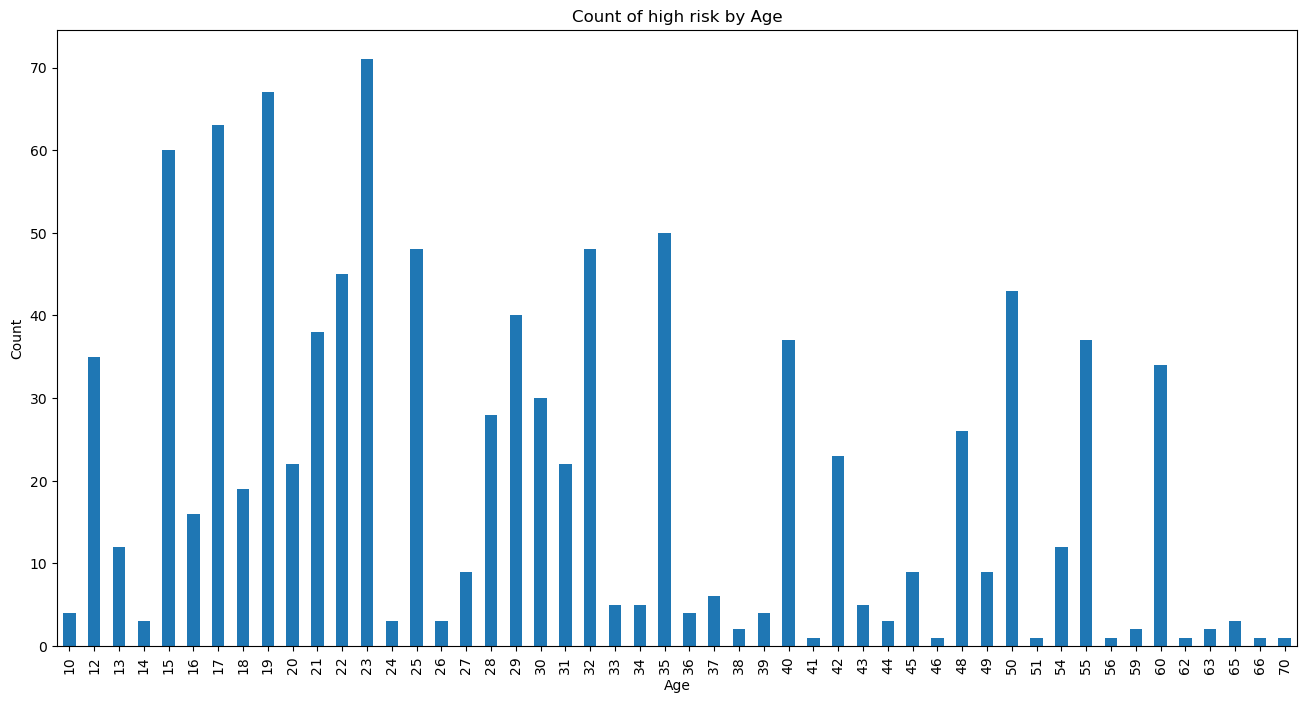

In [27]:
plt.figure(figsize=(16,8))
age_risk.groupby('Age')['high risk'].count().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of high risk by Age')


Text(0.5, 1.0, 'Count of high risk by Age')

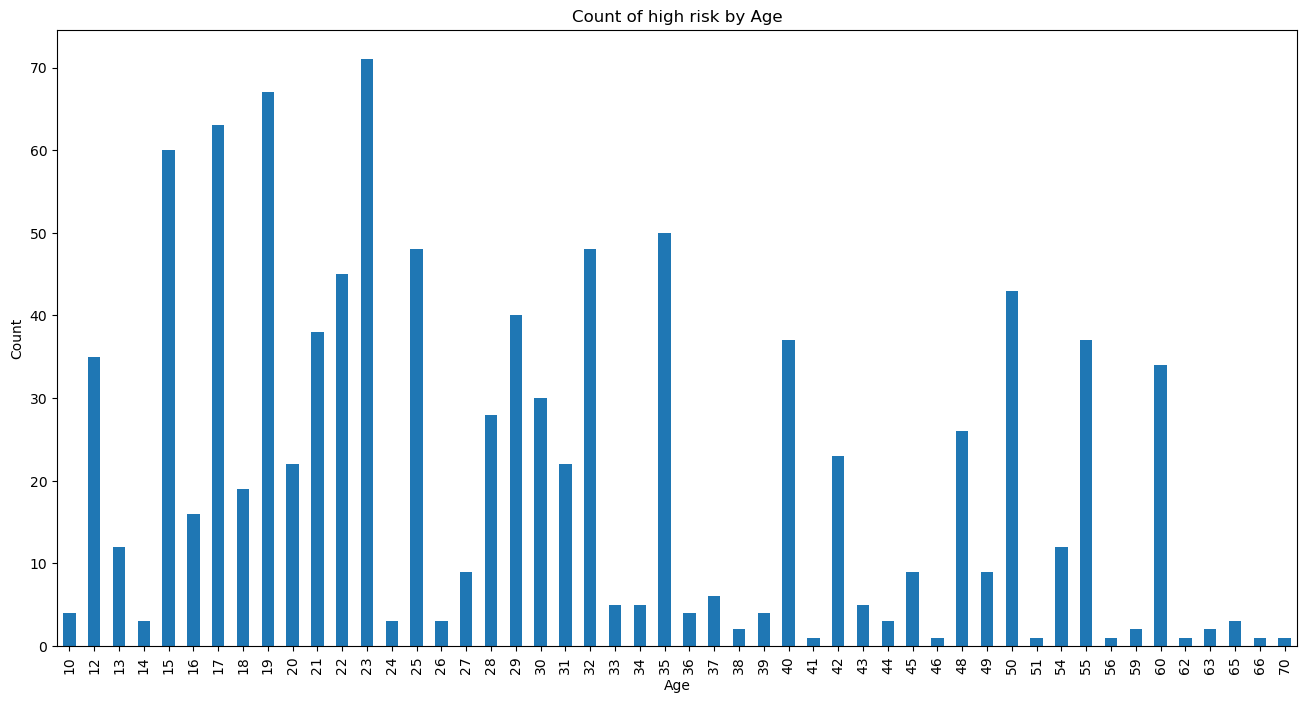

In [28]:
plt.figure(figsize=(16,8))
age_risk.groupby('Age')['low risk'].count().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of high risk by Age')


In [29]:
low_1=age_risk.groupby('Age')['low risk'].value_counts()
low_1

Age  low risk
10   0            2
     1            2
12   0           20
     1           15
13   0           10
                 ..
63   0            2
65   1            2
     0            1
66   1            1
70   1            1
Name: count, Length: 80, dtype: int64

Text(0.5, 1.0, 'Count of high risk by Age')

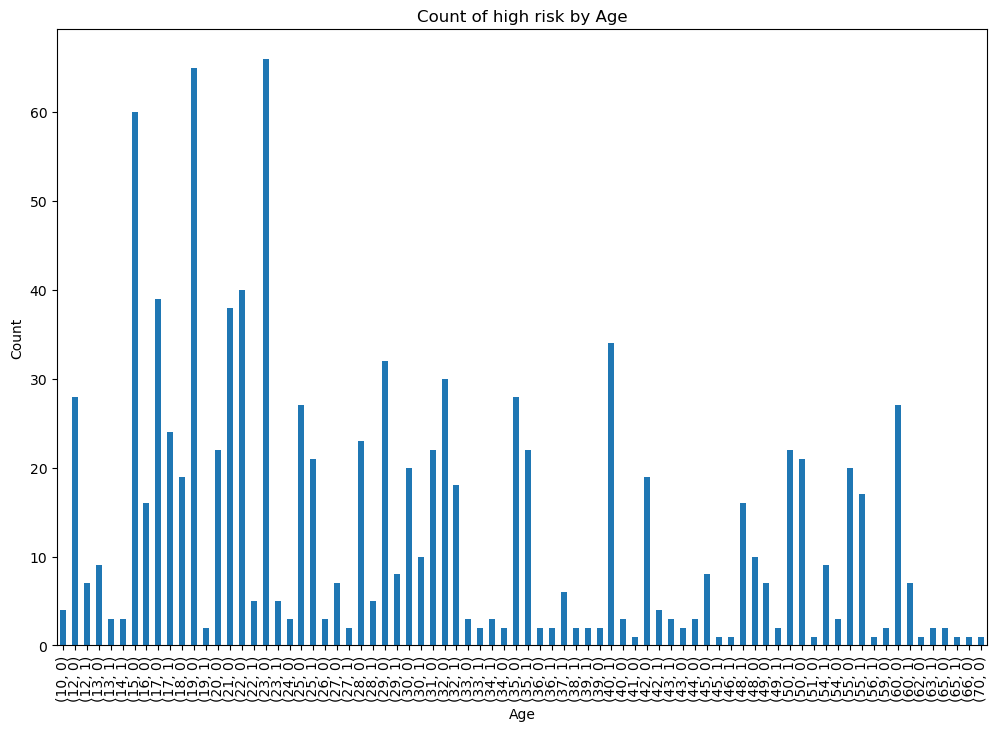

In [30]:
plt.figure(figsize=(12,8))
age_risk.groupby('Age')['high risk'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of high risk by Age')

In [31]:
filtered_df =age_risk[age_risk['low risk'] == 1]
filtered_df

,high risk,low risk,mid risk,Age
4,0,1,0,35
10,0,1,0,23
12,0,1,0,25
15,0,1,0,15
19,0,1,0,10
...,...,...,...,...
949,0,1,0,59
950,0,1,0,23
951,0,1,0,17
952,0,1,0,32


Text(0.5, 1.0, 'Count of low risk by Age')

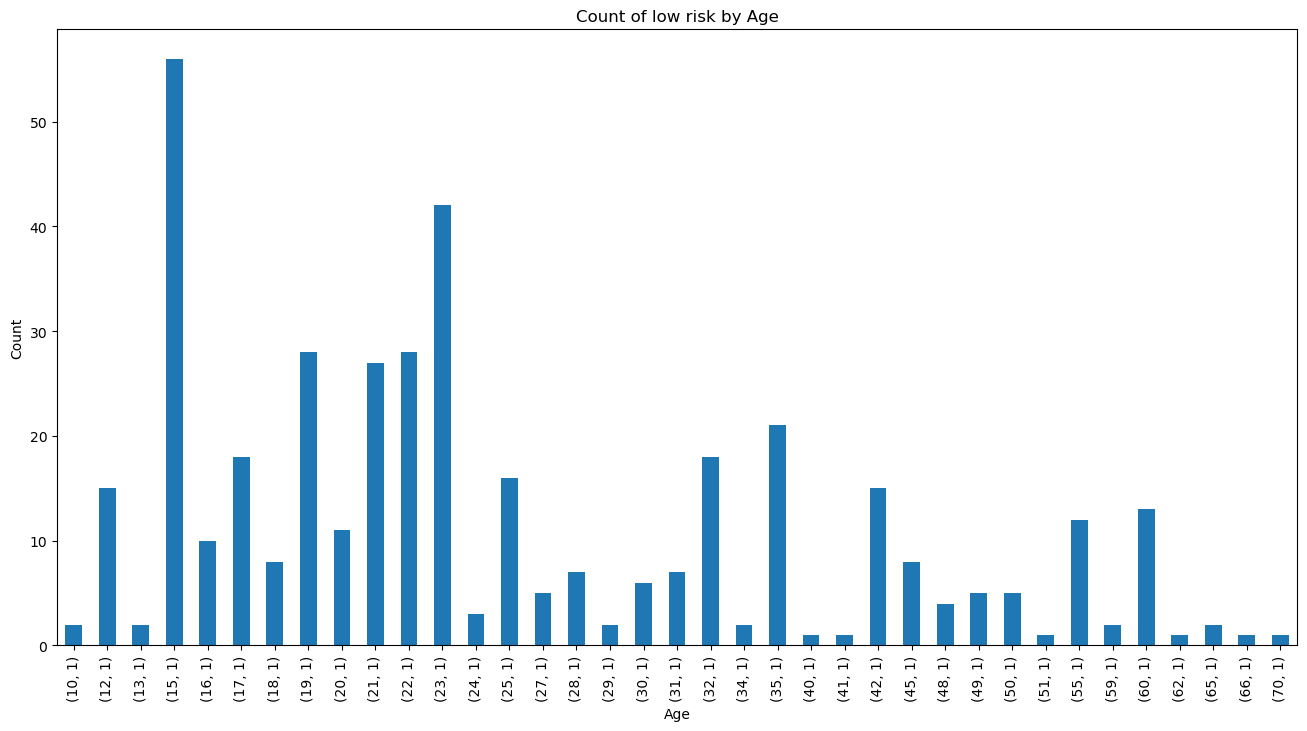

In [32]:
plt.figure(figsize=(16,8))
filtered_df.groupby('Age')['low risk'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of low risk by Age')


Text(0.5, 1.0, 'Count of high risk by Age')

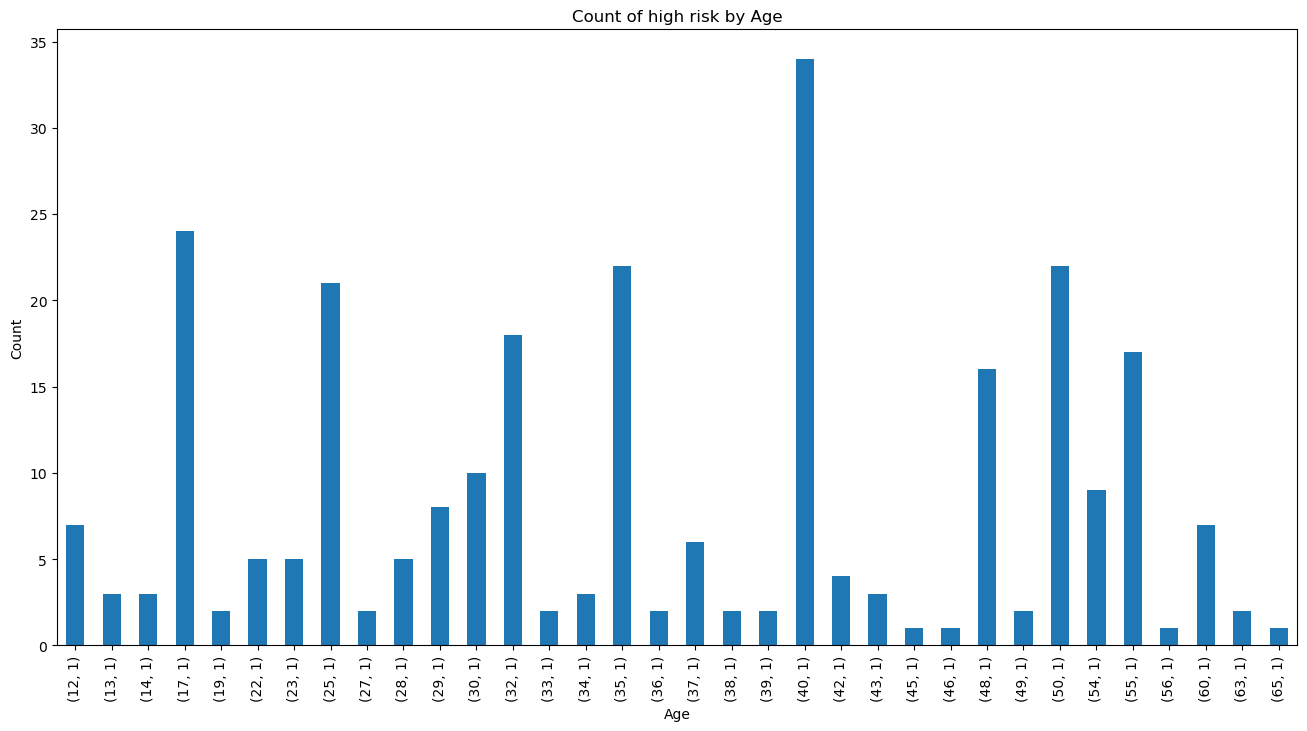

In [33]:
filtered_df_high =age_risk[age_risk['high risk'] == 1]
plt.figure(figsize=(16,8))
filtered_df_high.groupby('Age')['high risk'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of high risk by Age')


Text(0.5, 1.0, 'Count of mid risk by Age')

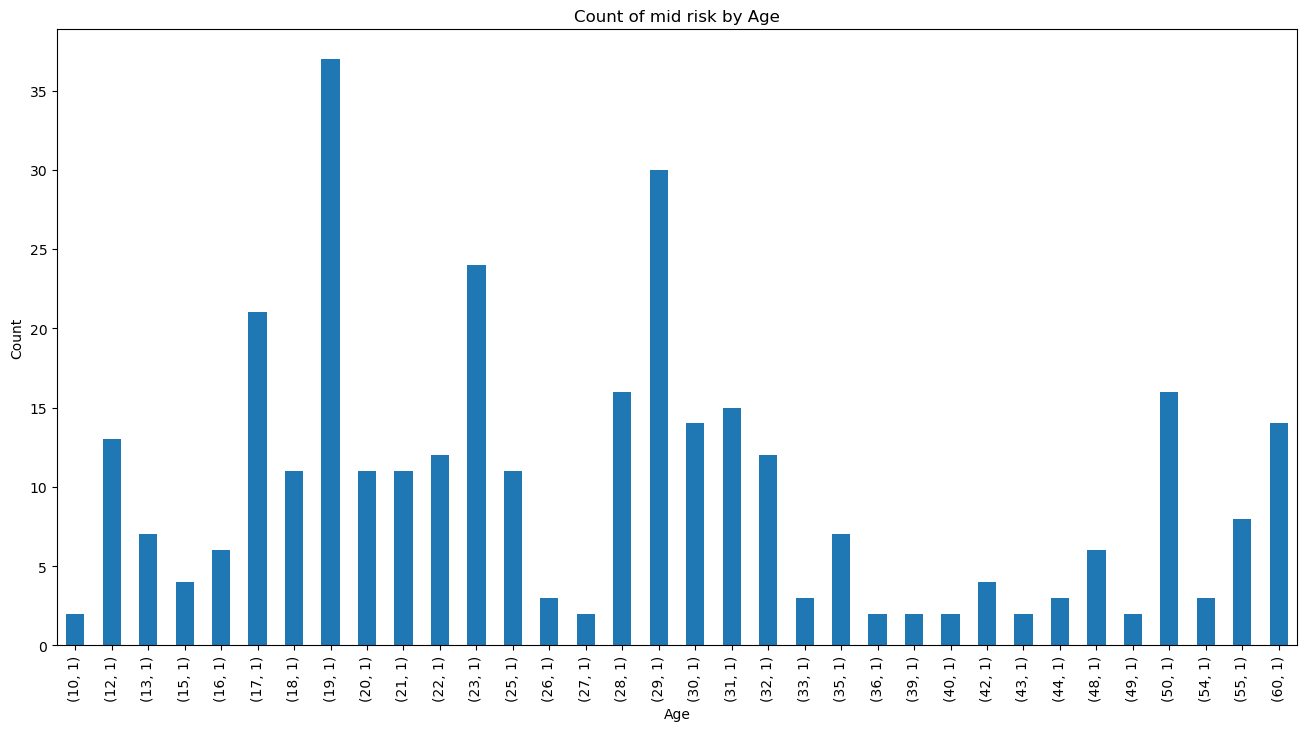

In [34]:
filtered_df_mid =age_risk[age_risk['mid risk'] == 1]
plt.figure(figsize=(16,8))
filtered_df_mid.groupby('Age')['mid risk'].value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of mid risk by Age')

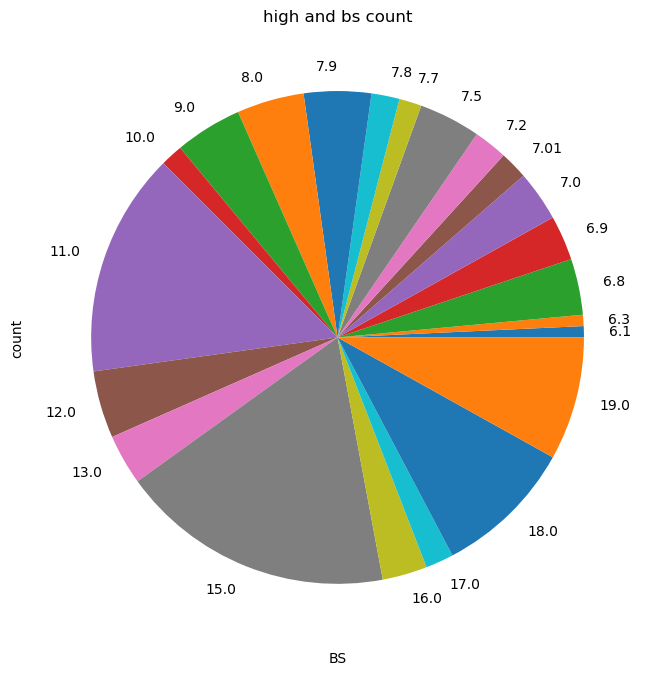

In [35]:
bs_risklevel=pd.concat([age_risk,df['BS']],axis=1)
bs_risklevel.drop('Age',axis=1,inplace=True)
#bs_risklevel.groupby('BS')['high risk'].value_counts()
filtered_bs = bs_risklevel[bs_risklevel['high risk'] == 1]
plt.figure(figsize=(16,8))
filtered_bs.groupby('BS')['high risk'].count().plot(kind='pie')
plt.xlabel('BS')
plt.ylabel('count')
plt.title('high and bs count')
plt.show()

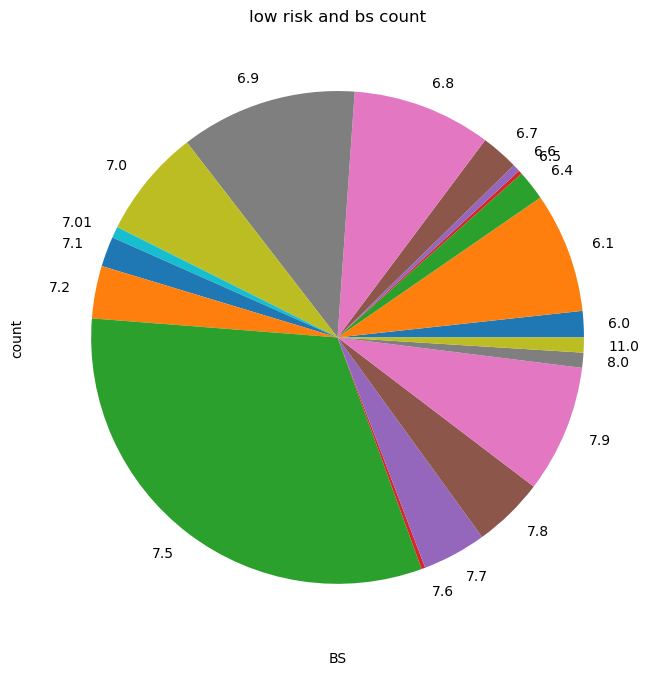

In [36]:
filtered_bs_low = bs_risklevel[bs_risklevel['low risk'] == 1]
plt.figure(figsize=(16,8))
filtered_bs_low.groupby('BS')['low risk'].count().plot(kind='pie')
plt.xlabel('BS')
plt.ylabel('count')
plt.title('low risk and bs count')
plt.show()

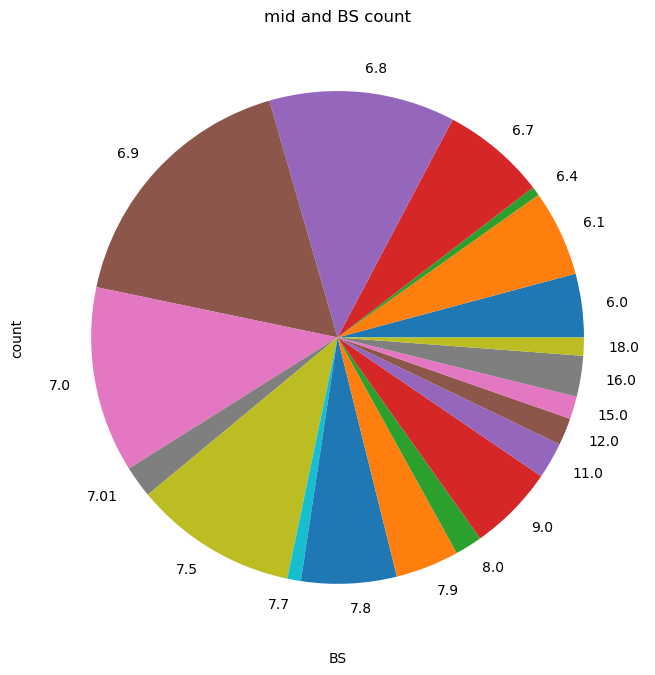

In [37]:
filtered_bs_mid = bs_risklevel[bs_risklevel['mid risk'] == 1]
plt.figure(figsize=(16,8))
filtered_bs_mid.groupby('BS')['mid risk'].count().plot(kind='pie')
plt.xlabel('BS')
plt.ylabel('count')
plt.title('mid and BS count')
plt.show()

In [38]:
#systolic_df=pd.concat([age_risk,df['SystolicBP']])

<Axes: xlabel='SystolicBP'>

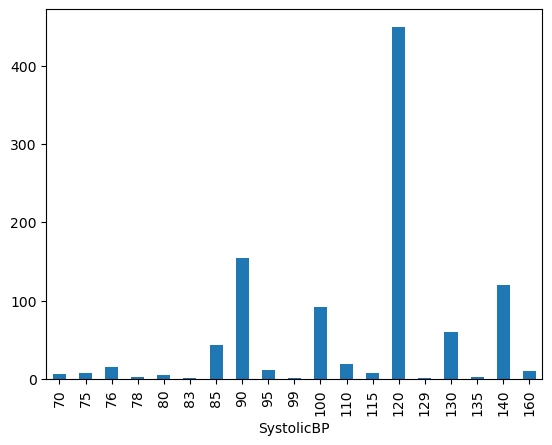

In [39]:
df.groupby('SystolicBP')['SystolicBP'].value_counts().plot(kind='bar')

<Axes: xlabel='SystolicBP,DiastolicBP'>

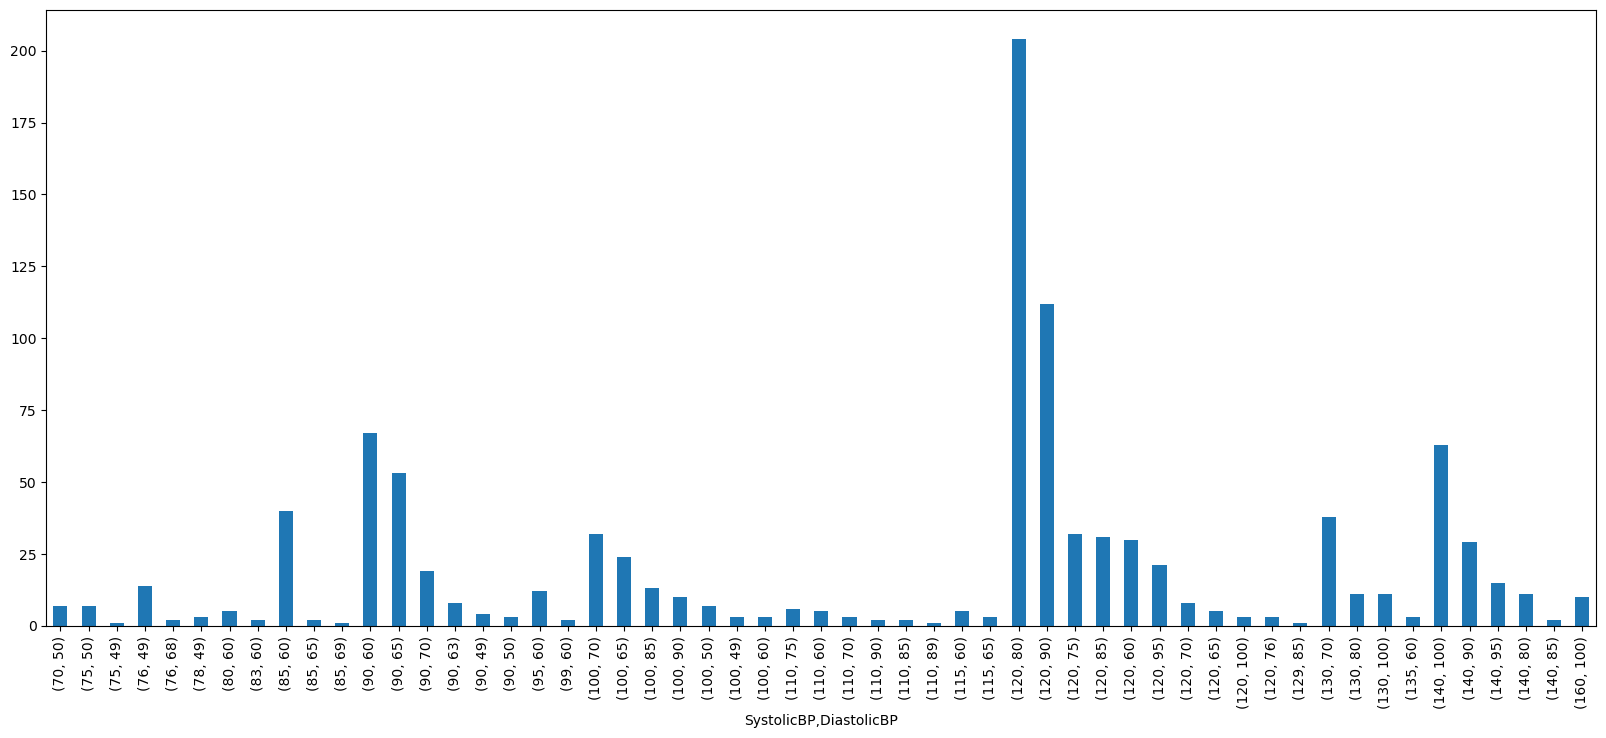

In [40]:
plt.figure(figsize=(20,8))
df.groupby('SystolicBP')['DiastolicBP'].value_counts().plot(kind='bar')


<Axes: xlabel='DiastolicBP'>

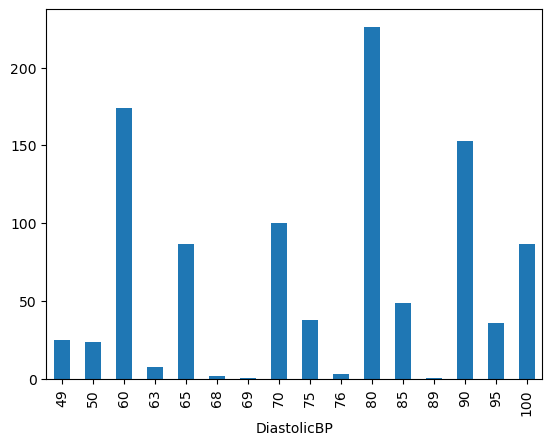

In [41]:
df.groupby('DiastolicBP')['DiastolicBP'].value_counts().plot(kind='bar')


<Axes: xlabel='DiastolicBP,SystolicBP'>

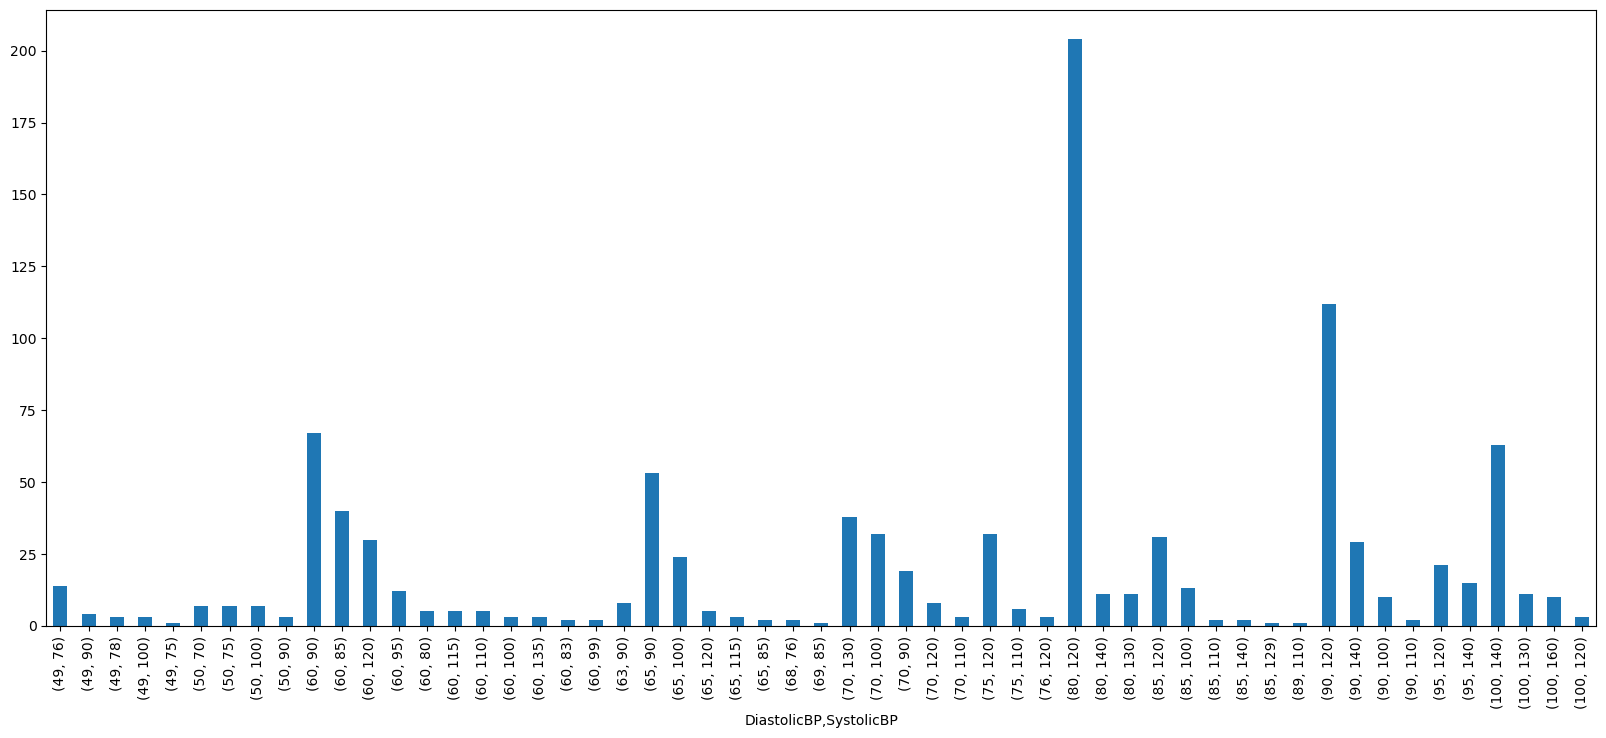

In [42]:
plt.figure(figsize=(20,8))
df.groupby('DiastolicBP')['SystolicBP'].value_counts().plot(kind='bar')


In [43]:
ds_df=df.groupby('DiastolicBP')['SystolicBP'].value_counts().reset_index(name='count')
ds_df.nunique()

DiastolicBP    16
SystolicBP     19
count          28
dtype: int64

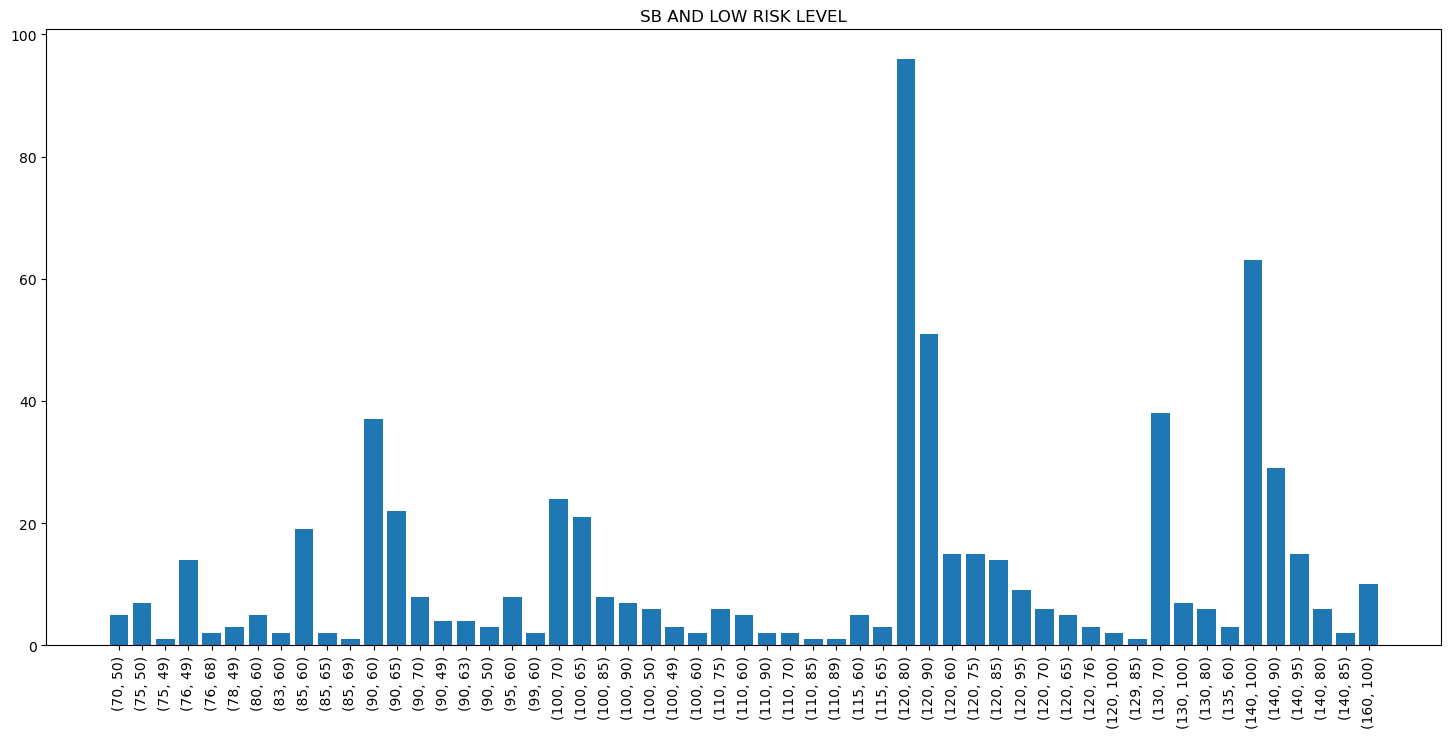

In [44]:
sdr_df=dfn.groupby('SystolicBP')[['DiastolicBP','RiskLevel']].value_counts().reset_index(name='count')
sdr_df['BP_Combined'] = '(' + sdr_df['SystolicBP'].astype(str) + ', ' + sdr_df['DiastolicBP'].astype(str) + ')'
plt.figure(figsize=(18,8))
sdr_1=sdr_df[(sdr_df['RiskLevel'] == 1)]
plt.bar(sdr_df['BP_Combined'],sdr_df['count'])
plt.xticks(rotation='vertical')
plt.title('SB AND LOW RISK LEVEL')
plt.show()

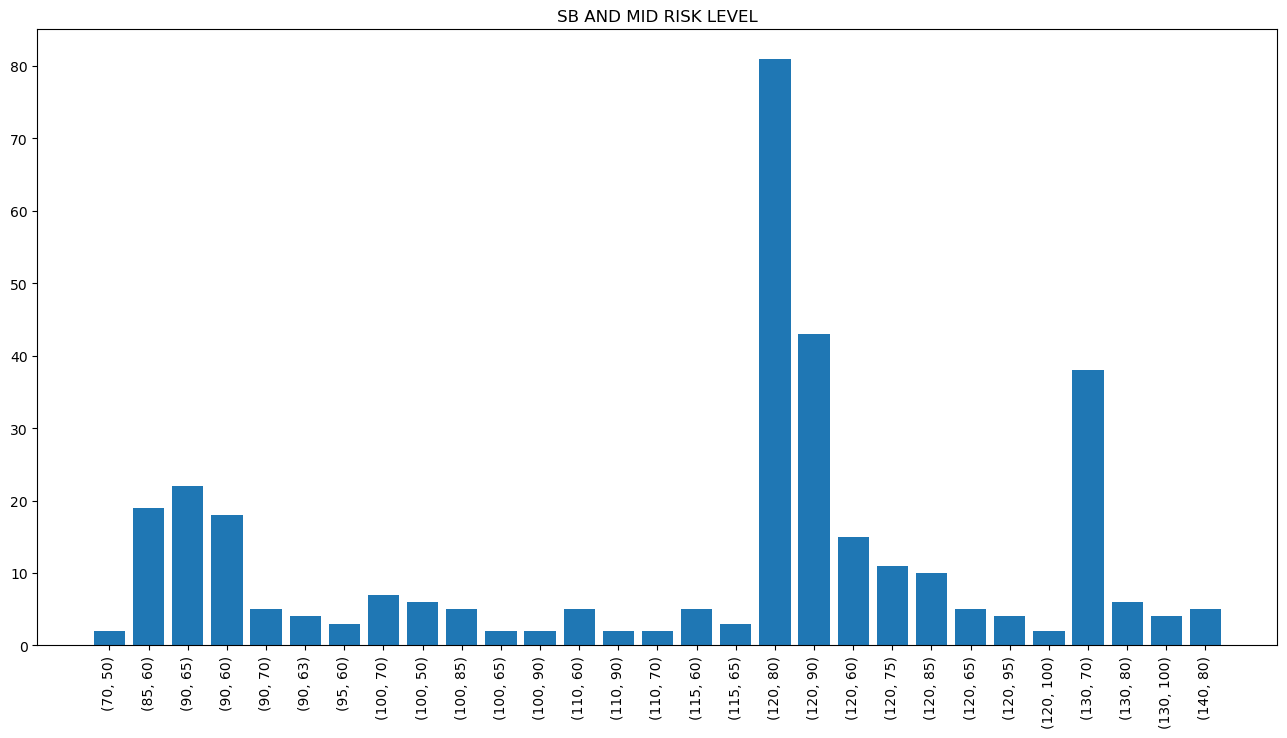

In [45]:
plt.figure(figsize=(16,8))
sdr_2=sdr_df[(sdr_df['RiskLevel'] == 2)]
plt.bar(sdr_2['BP_Combined'],sdr_2['count'])
plt.xticks(rotation='vertical') 
plt.title('SB AND MID RISK LEVEL')
plt.show()

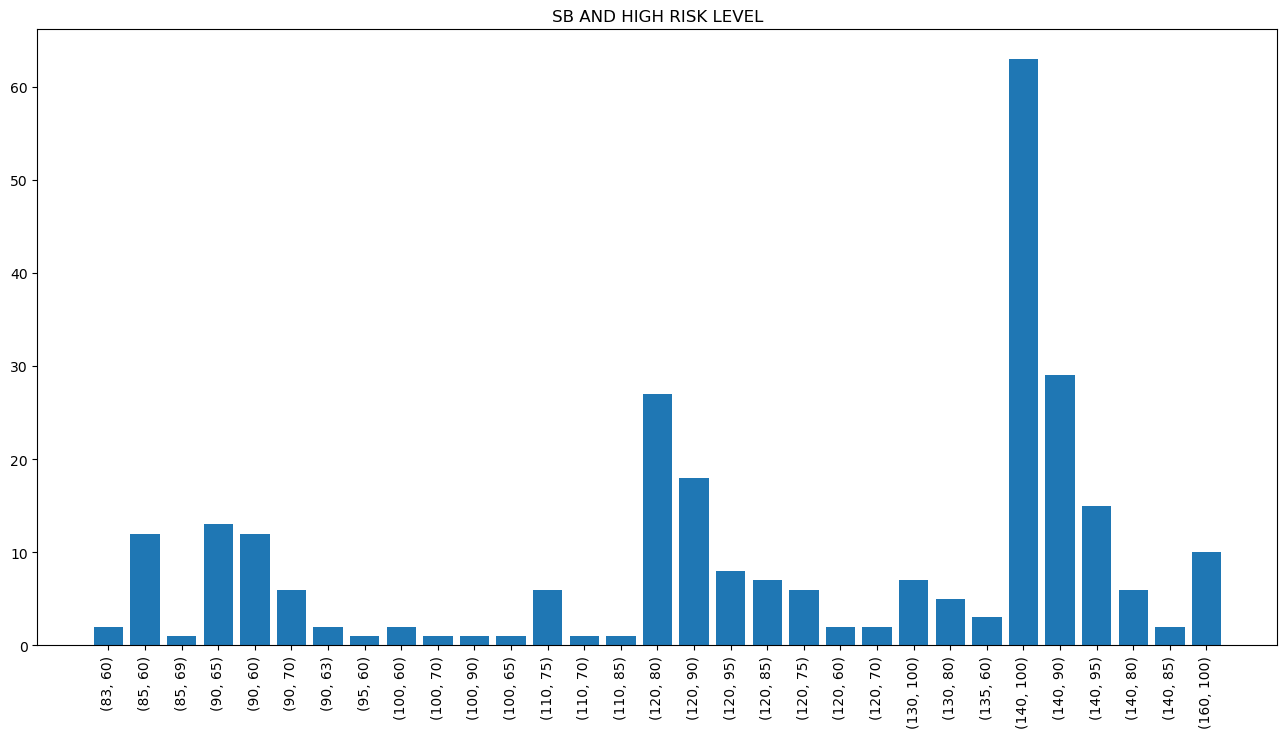

In [46]:
plt.figure(figsize=(16,8))
sdr_0=sdr_df[(sdr_df['RiskLevel'] == 0)]
plt.bar(sdr_0['BP_Combined'],sdr_0['count'])
plt.xticks(rotation='vertical') 
plt.title('SB AND HIGH RISK LEVEL')
plt.show()

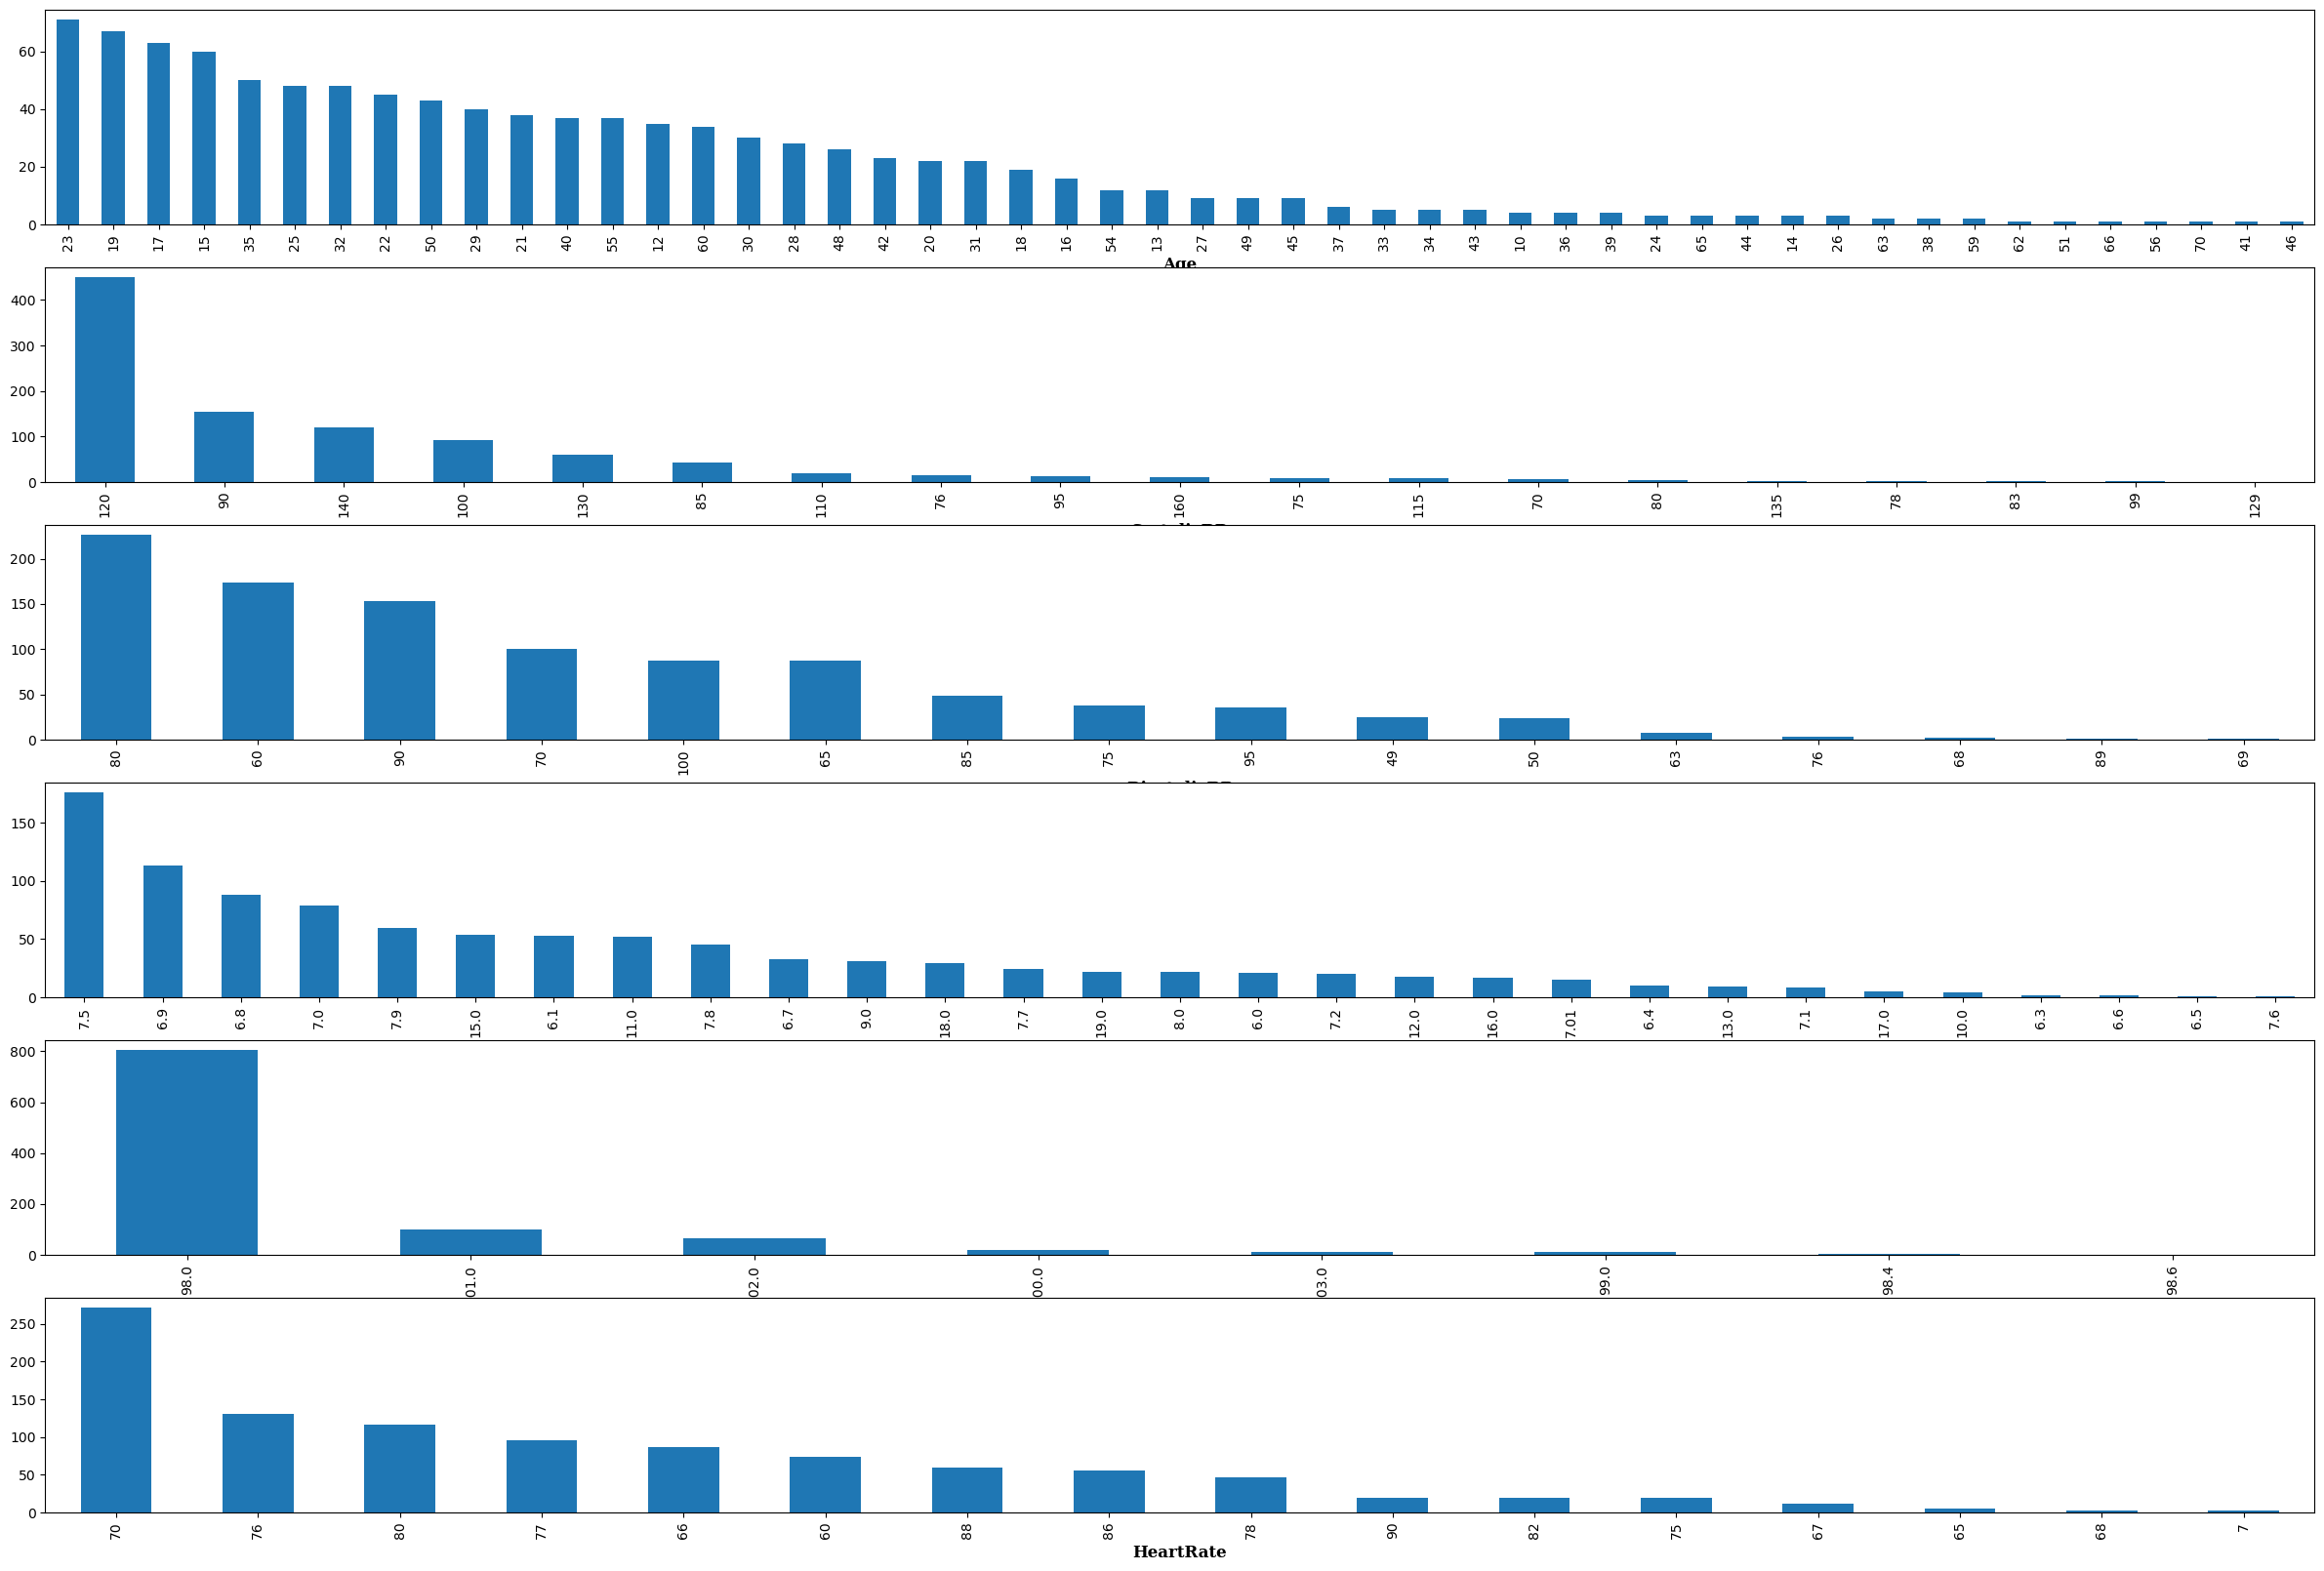

In [47]:
plt.figure(figsize=(30,20))
for i,col in enumerate(df.columns):
     plt.subplot(len(df.columns),1,i+1)
     dfn[col].value_counts().plot(kind='bar')
     plt.xlabel(col,fontdict=xfont)
    

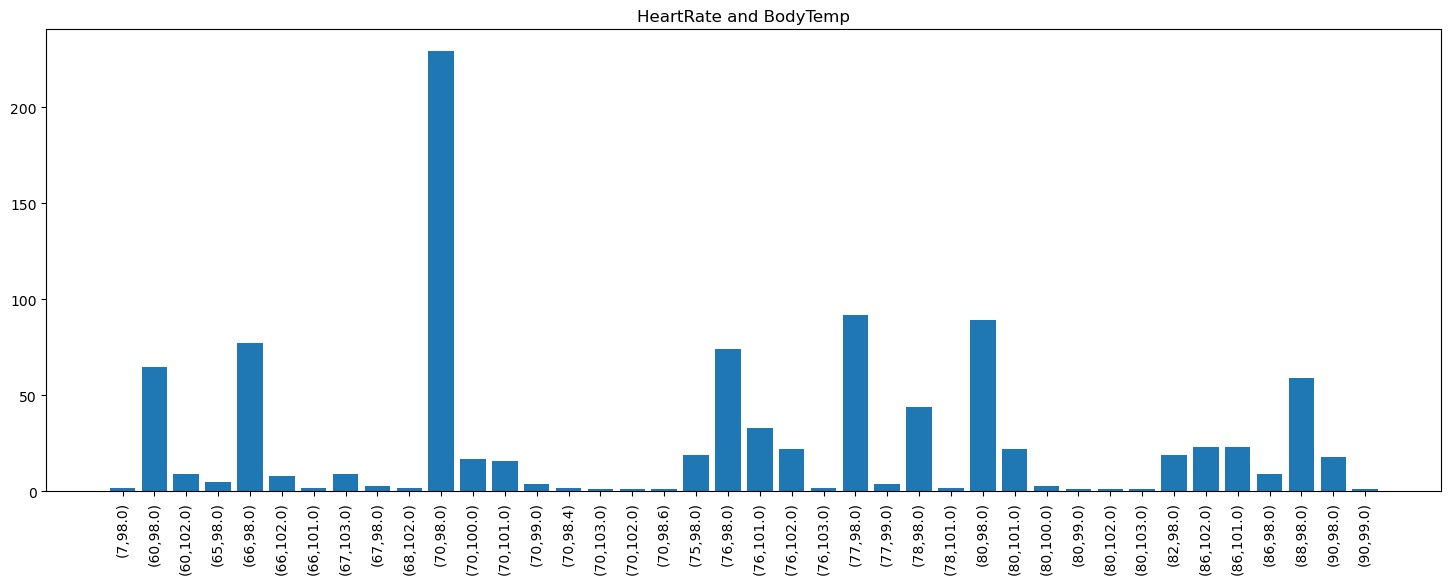

In [48]:
tem_rate=df.groupby('HeartRate')['BodyTemp'].value_counts().reset_index()
tem_rate['temp_rate'] = "(" +tem_rate['HeartRate'].astype(str)+","+tem_rate['BodyTemp'].astype(str)+")"
plt.figure(figsize=(18,6))
plt.bar(tem_rate['temp_rate'],tem_rate['count'])
plt.xticks(rotation='vertical')
plt.title('HeartRate and BodyTemp')
plt.show()           

Age
23    10
25     1
29    25
42     4
43     2
50    14
54     3
65     1
dtype: int64


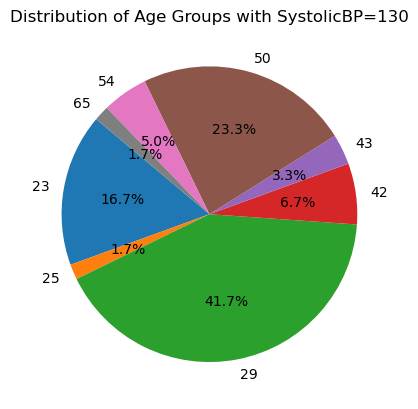

In [49]:
grouped = df[df['SystolicBP'] == 130].groupby('Age')
counts = grouped.size()
print(counts)
plt.pie(counts,labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Age Groups with SystolicBP=130')
plt.show()